<a href="https://colab.research.google.com/github/gnbhub/gnb_2022_1_Ai_team2/blob/master/week5/changbeom5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# /content/drive/MyDrive/GnB/ai/영화 관객수/movies_test.csv
# /content/drive/MyDrive/GnB/ai/영화 관객수/movies_train.csv
# /content/drive/MyDrive/GnB/ai/영화 관객수/submission.csv

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive_path = "/content/drive/MyDrive/GnB/ai/영화 관객수/"

train = pd.read_csv(drive_path + "movies_train.csv")
test = pd.read_csv(drive_path + "movies_test.csv")
submission = pd.read_csv(drive_path + "submission.csv")

print(train.shape, test.shape, submission.shape)
train.keys()

(600, 12) (243, 11) (243, 2)


Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

In [34]:
train.head(3)
# 목표 변수 box_off_num

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083


In [35]:
test.head(3)
# box_off_num 열 없음(테스트용)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7


In [36]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [38]:
'''
dir_prev_bfnum: 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의
                평균 관객수(단 관객수가 알려지지 않은 영화 제외)
dir_prev_bfnum 열의 결측값이 많음을 알 수 있음. 나머지 11개의 열은 결측값 없음
해당 열의 결측값은 너무 많아서 정보 가치가 없으므로 삭제.
''' 
train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)
'''
영화 제목과 감독의 이름은 너무 다양하고 서로 연관이 없는 문자 데이터이므로 관객수를 
예상하는데 도움이 되지 않는데이터이다.
그러므로 삭제.
'''
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distributor    600 non-null    object
 1   genre          600 non-null    object
 2   release_time   600 non-null    object
 3   time           600 non-null    int64 
 4   screening_rat  600 non-null    object
 5   dir_prev_num   600 non-null    int64 
 6   num_staff      600 non-null    int64 
 7   num_actor      600 non-null    int64 
 8   box_off_num    600 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 42.3+ KB


In [39]:
train.describe(include = 'all')

,distributor,genre,release_time,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num
count,600,600,600,600.000000,600,600.000000,600.000000,600.000000,6.000000e+02
unique,169,12,330,NaN,4,NaN,NaN,NaN,NaN
top,CJ 엔터테인먼트,드라마,2015-10-22,NaN,청소년 관람불가,NaN,NaN,NaN,NaN
freq,54,221,6,NaN,204,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,100.863333,NaN,0.876667,151.118333,3.706667,7.081818e+05
std,NaN,NaN,NaN,18.097528,NaN,1.183409,165.654671,2.446889,1.828006e+06
min,NaN,NaN,NaN,45.000000,NaN,0.000000,0.000000,0.000000,1.000000e+00
25%,NaN,NaN,NaN,89.000000,NaN,0.000000,17.000000,2.000000,1.297250e+03
50%,NaN,NaN,NaN,100.000000,NaN,0.000000,82.500000,3.000000,1.259100e+04
75%,NaN,NaN,NaN,114.000000,NaN,2.000000,264.000000,4.000000,4.798868e+05


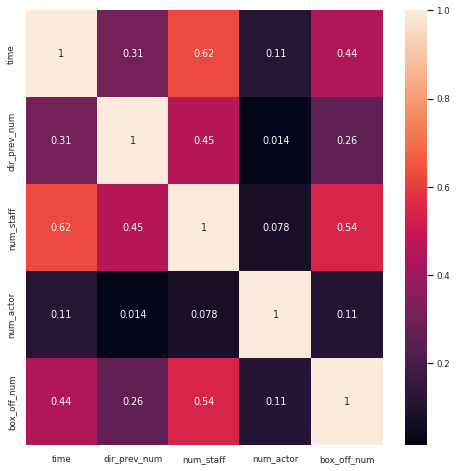

'\n숫자형 데이터로 구성된 열 중에 관객수는 상영시간과 스텝수와 상관관계가\n큼을 알 수 있음.\n또한 상영시간과 스텝수의 상관계수도 0.62로 서로 상관관계가\n큼을 알 수 있음.\n'

In [40]:
plt.figure(figsize = (8,8))
sns.set(font_scale = 0.8)
sns.heatmap(train.corr(), annot = True, cbar = True);
plt.show()

'''
숫자형 데이터로 구성된 열 중에 관객수는 상영시간과 스텝수와 상관관계가
큼을 알 수 있음.
또한 상영시간과 스텝수의 상관계수도 0.62로 서로 상관관계가
큼을 알 수 있음.
'''

In [41]:
train['TrainSplit'] = 'Train'
test['TrainSplit'] = 'Test'
data = pd.concat([train, test], axis = 0)
print(data.shape)

(843, 10)


In [42]:
data_num = data.loc[:, ['time', 'dir_prev_num',
                        'num_staff', 'num_actor', 'box_off_num']]

selected_features = ['time', 'dir_prev_num',
                     'num_staff', 'num_actor']

x_train = data_num.loc[data['TrainSplit']=='Train', selected_features]
y_train = data_num.loc[data['TrainSplit']=='Train', 'box_off_num']

x_test = data_num.loc[data['TrainSplit']=='Test', selected_features]

print("Train 데이터셋 크기: ", x_train.shape, y_train.shape)
print("Test 데이터셋 크기: ", x_test.shape)

Train 데이터셋 크기:  (600, 4) (600,)
Test 데이터셋 크기:  (243, 4)


In [43]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.2, 
                                            shuffle = True, random_state = 20)

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor (max_depth = 3, random_state = 12)
rfr.fit(x_tr, y_tr)

RandomForestRegressor(max_depth=3, random_state=12)

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_tr, y_tr)

print("회계귀수(기울기): ", np.round(lr.coef_, 1))
print("상수항(절편): ", np.round(lr.intercept_, 1))

회계귀수(기울기):  [18893.3 13946.1  4880.  55999. ]
상수항(절편):  -2094737.3


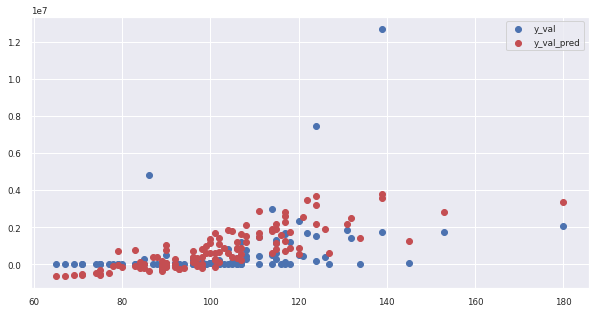

In [45]:
y_val_pred = lr.predict(x_val)

plt.figure(figsize=(10, 5))
plt.scatter(x_val['time'], y_val, label = 'y_val')
plt.scatter(x_val['time'], y_val_pred, c='r', label = 'y_val_pred')
plt.legend(loc = 'best')
plt.show()
#상영시간으로 예측한 관객수

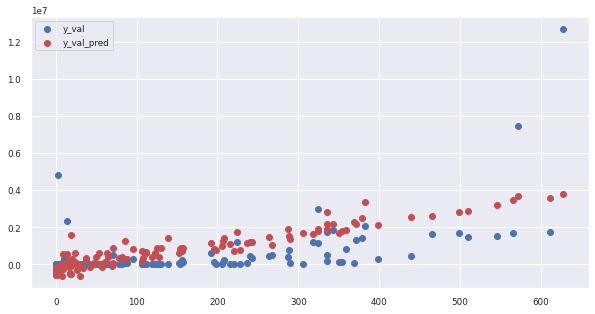

In [46]:
y_val_pred = lr.predict(x_val)

plt.figure(figsize=(10, 5))
plt.scatter(x_val['num_staff'], y_val, label = 'y_val')
plt.scatter(x_val['num_staff'], y_val_pred, c='r', label = 'y_val_pred')
plt.legend(loc = 'best')
plt.show()
# 스테프 숫자로 예측한 관객수

In [47]:
from sklearn.metrics import mean_squared_error
y_tr_pred = lr.predict(x_tr)
train_mse = mean_squared_error(y_tr, y_tr_pred)
print("Train MSE: %.0f" % (train_mse/100000000))

y_val_pred = lr.predict(x_val)
test_mse = mean_squared_error(y_val, y_val_pred)
print("Test MSE: %.0f" % (test_mse/100000000))

Train MSE: 24314
Test MSE: 17097


In [48]:
y_tr_pred = rfr.predict(x_tr)
train_mse = mean_squared_error(y_tr, y_tr_pred)
print("Train MSE: %.0f" % (train_mse/100000000))

y_val_pred = rfr.predict(x_val)
test_mse = mean_squared_error(y_val, y_val_pred)
print("Test MSE: %.0f" % (test_mse/100000000))

Train MSE: 14935
Test MSE: 17209


In [60]:
y_test_pred = lr.predict(x_test)
submission['box_off_num'] = y_test_pred.astype(int)

submission_filepath = drive_path + 'baseline_num_lr_submission_001.csv'
submission.to_csv(submission_filepath, index = False)
submission.head(5)

,title,box_off_num
0,용서는 없다,1946330
1,아빠가 여자를 좋아해,1605983
2,하모니,2556537
3,의형제,2227810
4,평행 이론,1907865
